![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

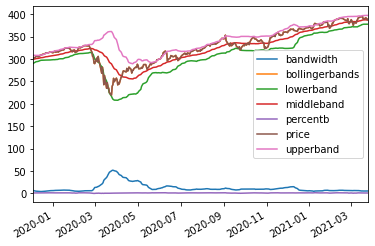

In [16]:
# QuantBook Analysis Tool 
# For more information see [https://www.quantconnect.com/docs/research/overview]
qb = QuantBook()
spy = qb.AddEquity("SPY")
history = qb.History(qb.Securities.Keys, 360, Resolution.Daily)

# Indicator Analysis
bbdf = qb.Indicator(BollingerBands(30, 2), spy.Symbol, 360, Resolution.Daily)
bbdf.drop('standarddeviation', 1).plot()

# Confidence interval and Hypothesis Testing

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

qb = QuantBook()
spy = qb.AddEquity("SPY").Symbol

#get SPY data from August 2010 to the present
start_date = datetime(2010, 8, 1, 0, 0, 0)
end_date = qb.Time
spy_table = qb.History(spy, start_date, end_date, Resolution.Daily)

spy_total = spy_table[['open','close']]
#calculate log returns
spy_log_return = np.log(spy_total.close).diff().dropna()
print('Population mean:', np.mean(spy_log_return))
print('Population standard deviation:',np.std(spy_log_return))


Population mean: 0.000542344094284655
Population standard deviation: 0.010784946733825547


para comprobar que nos esta funcionando, revisamos un ejemplo de 10 dias y uno de 1000

In [18]:
print('10 dias retorno simple', np.mean(spy_log_return.tail(10)))
print('10 dias desviacion estandar', np.std(spy_log_return.tail(10)))
print('1000 dias retorno simple', np.mean(spy_log_return.tail(1000)))
print('1000 dias desviacion estandar', np.std(spy_log_return.tail(1000)))

10 dias retorno simple -0.0006510753020917192
10 dias desviacion estandar 0.006689475739950109
1000 dias retorno simple 0.0005780622517210929
1000 dias desviacion estandar 0.012922837444767299


## Confidence Interval
definimos el error estadar como:
$$SE=\frac{\sigma }{\sqrt{n}}$$
si queremos general el intervalo de confianza (95%) de una poblacion, el intervalo es calculado asi:
$$(\mu-1.96*SE,\mu+1.96*SE)$$
Ahora lo aplicaremos al codigo

In [19]:
abajo1 = np.mean(spy_log_return.tail(10))-1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
arriba1 = np.mean(spy_log_return.tail(10))+1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
abajo2 = np.mean(spy_log_return.tail(1000))-1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))
arriba2 = np.mean(spy_log_return.tail(1000))+1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))
print("10 dias 95% intervalo de confianza es:", (abajo1,arriba1))
print("1000 dias 95% intervalo de confianza es:", (abajo2,arriba2))

10 dias 95% intervalo de confianza es: (-0.004797255321465502, 0.003495104717282064)
1000 dias 95% intervalo de confianza es: (-0.00022290351136737812, 0.001379028014809564)


si aplicaramos el limite para n cercano al infinito el intervalo seria muy certero.

## intervalo de confianza de una distribucion normal

la distribucion normal la usamos para ver valores criticos, especificamente nosotros usamos 90%, 95%, 99% como niveles de confianza, los valores criticos para estos tres son 1.64, 1.96 y 2.32.
ahora recordamos la regla de los tres sigmas:
$$P(\mu-\sigma\leq X\leq\mu+\sigma)\approx 0.6827$$
$$P(\mu-2\sigma\leq X\leq\mu+2\sigma)\approx 0.9545$$
$$P(\mu-3\sigma\leq X\leq\mu+3\sigma)\approx 0.9545$$

## Central limit Theory
dado un tamaño de muestra suficientemente grande de una poblacion con nivel finito de varianza, la dedia de todas las muestras sera aproxmadamente igual a la media de la poblacion.

# Hypothesis testing
es una prueba de inferencia basada en una muestra, por ejemplo, suponemos que no conocemos la media de la poblacion entonces la suponemos 0, nos toca probarlo, lo primero es tener los datos.

In [20]:
mean_500 = np.mean(spy_log_return.tail(500))
std_500 = np.std(spy_log_return.tail(500))
mean_50 = np.mean(spy_log_return.tail(50))
std_50 = np.std(spy_log_return.tail(50))
serie = pd.Series([mean_50,std_50,mean_500,std_500],index = ['mean_50', 'std_50','mean_500','std_1000'])
print(serie)

mean_50     0.000634
std_50      0.010064
mean_500    0.000692
std_1000    0.016123
dtype: float64


sacamos el intervalo de confianza al 90%

In [21]:
abajo = 0 - 1.64*std_500/np.sqrt(500)
arriba = 0 + 1.64*std_500/np.sqrt(500)
print((abajo,arriba))

(-0.0011825284200435203, 0.0011825284200435203)


como se ve la media de la muestra esta dentro del intervalo de confianza del 90% (en el tutorial no es asi pero lo prueban con 95%) por lo que se puede afirmar que la media de la poblacion es 0, ahora probamos con confianza al 95%

In [22]:
abajo = 0 - 1.96*std_500/np.sqrt(500)
arriba = 0 + 1.96*std_500/np.sqrt(500)
print((abajo,arriba))

(-0.001413265672734939, 0.001413265672734939)


si el valor probado esta fuera del intervalo de convianza entonces rechazamos la hipotesis nula o aceptamos la hipotesis alternativa, el anterior metodo es sencillo pero es mejor calcular Z-Score:
$$Z=\frac{X-\mu}{\frac{\sigma}{\sqrt{n}}}$$


In [23]:
z = np.sqrt(500)*(mean_500-0)/std_500
print(z)

0.9600188579717637


podemos tambien conocer el intervalo con una libreria de python 

In [24]:
import scipy.stats as st
print((1-st.norm.cdf(1.9488)))

0.02565965688799665


cuanto mas alta sea la puntuacion de Z mas lejos estara el valor probado,con 95% estamos os suficientemente lejos del 0 por lo que rechazamos la Hipotesis nula. Podemos conocer el ancho del intervalo de concianza con una tabla de distribucion normal, en python quedaria:

In [25]:
import scipy.stats as st
print((1 - st.norm.cdf(z)))

0.16852286200791433


In [26]:
mean_1500 = np.mean(spy_log_return.tail(1500))
std_1500 = np.std(spy_log_return.tail(1500))
z_score = np.sqrt(1500)*(mean_1500 - 0)/std_1500
print('z-score = ',z_score)
p_value = (1 - st.norm.cdf(z_score))
print('p_value = ',p_value)

z-score =  1.623505763486281
p_value =  0.052240666154189874
